In [1]:
import gym_examples
import gym
import numpy as np
import stable_baselines3
# from stable_baselines3 import PPO
import sb3_contrib as sb3
from sb3_contrib import MaskablePPO
from sb3_contrib.common.wrappers import ActionMasker
from sb3_contrib.common.maskable.policies import MaskableActorCriticPolicy
from gym.wrappers import FlattenObservation
from stable_baselines3.common.env_util import make_vec_env
from stable_baselines3.common.vec_env import SubprocVecEnv
from sb3_contrib.common.maskable.utils import get_action_masks
from stable_baselines3.common.callbacks import EvalCallback
from stable_baselines3.common.callbacks import ProgressBarCallback
from stable_baselines3.common.vec_env import DummyVecEnv
from stable_baselines3.common.monitor import Monitor
from qlearner import qlearner
from qlearner.policy import*
from qlearner.graphing_utils import*

c:\Users\Eshwar\Documents\GDriveSync\CourseNotes\CSCI566 - Deep Learning\Deep_RL_For_CNN\venv\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
print(sb3.__version__, gym.__version__, stable_baselines3.__version__)
env_id = "gym_examples/CNN-v0"
model_save_path = "./logs/best_model"
log_path = "./logs"

1.7.0 0.26.0 2.0.0a0


# CNN ENV TESTING

In [ ]:
env2 = gym.make("gym_examples/CNN-v0")

In [ ]:
start_cnn = env2.reset()
start_cnn

({'layer_type': 0,
  'layer_depth': 0,
  'filter_depth': 0,
  'filter_size': 0,
  'fc_size': 0,
  'is_start': 1,
  'pool_size_and_stride': 0},
 {'current_network': [{'layer_type': 'conv',
    'layer_depth': 0,
    'filter_depth': 0,
    'filter_size': 0,
    'fc_size': 0,
    'image_size': 28,
    'pool_size': 0,
    'pool_stride': 0,
    'is_start': 1}],
  'current_image_size': 28,
  'current_layer_depth': 0,
  'current_num_fc_layers': 0,
  'obs_vector': array([0, 0, 0, 0, 0, 1, 0])})

In [ ]:
env2.action_space

MultiDiscrete([3 9 5 4 5 2 4])

In [ ]:
env2.get_valid_action_mask()

inside layer depth limit
enabling convolutions


(array([1, 0, 0], dtype=int8),
 array([0, 1, 0, 0, 0, 0, 0, 0, 0], dtype=int8),
 array([0, 1, 1, 1, 1], dtype=int8),
 array([0, 1, 1, 1], dtype=int8),
 array([1, 0, 0, 0, 0], dtype=int8),
 array([1, 0], dtype=int8),
 array([1, 0, 0, 0], dtype=int8))

In [ ]:
env2.action_space.sample(mask=env2.get_valid_action_mask())

inside layer depth limit
enabling convolutions


array([0, 1, 4, 2, 0, 0, 0], dtype=int64)

In [ ]:
# take an action that picks a conv layer, with 20 filters with a 3x3 kernel. 
action = np.array([0, 1, 2, 2, 0, 0, 0], dtype=np.int64)

new_obs, reward, terminated, _, info = env2.step(action)

inside layer depth limit
enabling convolutions
enabling valid pools


In [ ]:
new_obs

{'layer_type': 0,
 'layer_depth': 1,
 'filter_depth': 2,
 'filter_size': 2,
 'fc_size': 0,
 'is_start': 0,
 'pool_size_and_stride': 0}

In [ ]:
info

{'current_network': [{'layer_type': 'conv',
   'layer_depth': 0,
   'filter_depth': 0,
   'filter_size': 0,
   'fc_size': 0,
   'image_size': 28,
   'pool_size': 0,
   'pool_stride': 0,
   'is_start': 1},
  {'layer_type': 'conv',
   'layer_depth': 1,
   'filter_depth': 20,
   'filter_size': 3,
   'fc_size': 0,
   'image_size': 26,
   'is_start': 0,
   'pool_size': 0,
   'pool_stride': 0}],
 'current_image_size': 26,
 'current_layer_depth': 1,
 'current_num_fc_layers': 0,
 'obs_vector': array([0, 1, 2, 2, 0, 0, 0])}

In [ ]:
env2.get_valid_action_mask()

inside layer depth limit
enabling convolutions
enabling valid pools


(array([1, 1, 1], dtype=int8),
 array([0, 0, 1, 0, 0, 0, 0, 0, 0], dtype=int8),
 array([0, 1, 1, 1, 1], dtype=int8),
 array([0, 1, 1, 1], dtype=int8),
 array([0, 1, 1, 1, 1], dtype=int8),
 array([1, 1], dtype=int8),
 array([0, 1, 1, 1], dtype=int8))

In [ ]:
#make an fc layer with 512
action = np.array([2, 2, 2, 2, 1, 0, 1], dtype=np.int64)
new_obs, reward, terminated, _, info = env2.step(action)

info

{'current_network': [{'layer_type': 'conv',
   'layer_depth': 0,
   'filter_depth': 0,
   'filter_size': 0,
   'fc_size': 0,
   'image_size': 28,
   'pool_size': 0,
   'pool_stride': 0,
   'is_start': 1},
  {'layer_type': 'conv',
   'layer_depth': 1,
   'filter_depth': 20,
   'filter_size': 3,
   'fc_size': 0,
   'image_size': 26,
   'is_start': 0,
   'pool_size': 0,
   'pool_stride': 0},
  {'layer_type': 'fc',
   'layer_depth': 2,
   'filter_depth': 20,
   'filter_size': 3,
   'fc_size': 512,
   'image_size': 26,
   'is_start': 0,
   'pool_size': 5,
   'pool_stride': 3}],
 'current_image_size': 26,
 'current_layer_depth': 2,
 'current_num_fc_layers': 1}

In [ ]:
env2.get_valid_action_mask() #Only fc layer allowed and fc layer with less than 512 nodes and this has to be terminal layer

inside layer depth limit


(array([0, 0, 1], dtype=int8),
 array([0, 0, 0, 1, 0, 0, 0, 0, 0], dtype=int8),
 array([1, 0, 0, 0, 0], dtype=int8),
 array([1, 0, 0, 0], dtype=int8),
 array([0, 0, 1, 1, 1], dtype=int8),
 array([0, 1], dtype=int8),
 array([1, 0, 0, 0], dtype=int8))

In [ ]:
action = np.array([2, 3, 0, 0, 2, 1, 0], dtype=np.int64)
new_obs, reward, terminated, _, info = env2.step(action)

info

network =  [{'layer_type': 'conv', 'layer_depth': 0, 'filter_depth': 0, 'filter_size': 0, 'fc_size': 0, 'image_size': 28, 'pool_size': 0, 'pool_stride': 0, 'is_start': 1}, {'layer_type': 'conv', 'layer_depth': 1, 'filter_depth': 20, 'filter_size': 3, 'fc_size': 0, 'image_size': 26, 'is_start': 0, 'pool_size': 0, 'pool_stride': 0}, {'layer_type': 'fc', 'layer_depth': 2, 'filter_depth': 20, 'filter_size': 3, 'fc_size': 512, 'image_size': 26, 'is_start': 0, 'pool_size': 5, 'pool_stride': 3}, {'layer_type': 'fc', 'layer_depth': 3, 'filter_depth': 0, 'filter_size': 0, 'fc_size': 256, 'image_size': 26, 'is_start': 0, 'pool_size': 0, 'pool_stride': 0}] terminated = True
layersList =  [('conv', 1, 20, 3, 1, 26, 0, 0, []), ('fc', 2, 20, 5, 3, 26, 512, 0, []), ('fc', 3, 0, 0, 0, 26, 256, 0, [])]


{'current_network': [{'layer_type': 'conv',
   'layer_depth': 0,
   'filter_depth': 0,
   'filter_size': 0,
   'fc_size': 0,
   'image_size': 28,
   'pool_size': 0,
   'pool_stride': 0,
   'is_start': 1},
  {'layer_type': 'conv',
   'layer_depth': 1,
   'filter_depth': 20,
   'filter_size': 3,
   'fc_size': 0,
   'image_size': 26,
   'is_start': 0,
   'pool_size': 0,
   'pool_stride': 0},
  {'layer_type': 'fc',
   'layer_depth': 2,
   'filter_depth': 20,
   'filter_size': 3,
   'fc_size': 512,
   'image_size': 26,
   'is_start': 0,
   'pool_size': 5,
   'pool_stride': 3},
  {'layer_type': 'fc',
   'layer_depth': 3,
   'filter_depth': 0,
   'filter_size': 0,
   'fc_size': 256,
   'image_size': 26,
   'is_start': 0,
   'pool_size': 0,
   'pool_stride': 0}],
 'current_image_size': 26,
 'current_layer_depth': 3,
 'current_num_fc_layers': 2}

In [ ]:
reward

0.9907848744836352

In [ ]:
# env = gym.make("gym_examples/StarWars-v0")

# PPO DEBUGGING

In [4]:
cnn_env = gym.make(env_id)
cnn_env.verbose = True

In [5]:
cnn_env.observation_space.sample()

OrderedDict([('fc_size', 2),
             ('filter_depth', 2),
             ('filter_size', 2),
             ('is_start', 0),
             ('layer_depth', 4),
             ('layer_type', 2),
             ('pool_size_and_stride', 0)])

In [5]:
eval_env = FlattenObservation(gym.make(env_id))
eval_env = DummyVecEnv([lambda: eval_env])
eval_env = Monitor(eval_env)

In [6]:
eval_callback = EvalCallback(eval_env, 
                             best_model_save_path=model_save_path, 
                             log_path=log_path, 
                             eval_freq=20, 
                             deterministic=True, 
                             render=False)

In [6]:
model = MaskablePPO(MaskableActorCriticPolicy, FlattenObservation(cnn_env), verbose=1)

Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.


In [ ]:
model.learn(total_timesteps=100, progress_bar=True)

# Q-Learning

In [3]:
env = gym.make(env_id)
agent = qlearner.QLearner(
    env,
    lr=0.1,
    epsilion=0.5,
    q_path="logs/qlearner/",
    reply_memory_path="logs/qlearner/",
)

In [4]:
# This cell may take a very long time (3-4 hours) to run
agent.run_experiment()
agent.save('logs/qlearner/')

100%|██████████| 1/1 [01:54<00:00, 114.14s/it]


network =  [{'layer_type': 'conv', 'layer_depth': 1, 'filter_depth': 10, 'filter_size': 1, 'fc_size': 0, 'image_size': 28, 'is_start': 0, 'pool_size': 0, 'pool_stride': 0}, {'layer_type': 'fc', 'layer_depth': 2, 'filter_depth': 64, 'filter_size': 5, 'fc_size': 512, 'image_size': 28, 'is_start': 0, 'pool_size': 3, 'pool_stride': 2}] terminated = True reward = 0.9825230378137909


100%|██████████| 1/1 [01:53<00:00, 113.67s/it]


network =  [{'layer_type': 'conv', 'layer_depth': 1, 'filter_depth': 10, 'filter_size': 1, 'fc_size': 0, 'image_size': 28, 'is_start': 0, 'pool_size': 0, 'pool_stride': 0}, {'layer_type': 'fc', 'layer_depth': 2, 'filter_depth': 64, 'filter_size': 5, 'fc_size': 512, 'image_size': 28, 'is_start': 0, 'pool_size': 3, 'pool_stride': 2}] terminated = True reward = 0.9869717190975532


100%|██████████| 1/1 [01:56<00:00, 116.37s/it]


network =  [{'layer_type': 'conv', 'layer_depth': 1, 'filter_depth': 10, 'filter_size': 1, 'fc_size': 0, 'image_size': 28, 'is_start': 0, 'pool_size': 0, 'pool_stride': 0}, {'layer_type': 'fc', 'layer_depth': 2, 'filter_depth': 64, 'filter_size': 5, 'fc_size': 512, 'image_size': 28, 'is_start': 0, 'pool_size': 3, 'pool_stride': 2}] terminated = True reward = 0.9895138226882746


100%|██████████| 1/1 [02:19<00:00, 139.40s/it]

network =  [{'layer_type': 'conv', 'layer_depth': 1, 'filter_depth': 10, 'filter_size': 1, 'fc_size': 0, 'image_size': 28, 'is_start': 0, 'pool_size': 0, 'pool_stride': 0}, {'layer_type': 'fc', 'layer_depth': 2, 'filter_depth': 64, 'filter_size': 5, 'fc_size': 512, 'image_size': 28, 'is_start': 0, 'pool_size': 3, 'pool_stride': 2}] terminated = True reward = 0.9860184302510328


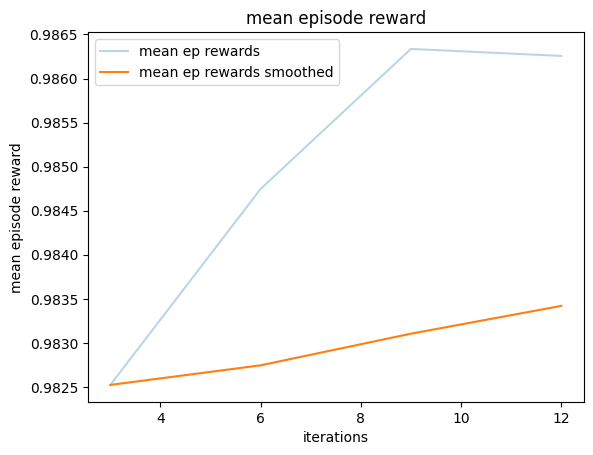

In [6]:
plot_mean_rewards(agent, "logs/qlearner/")

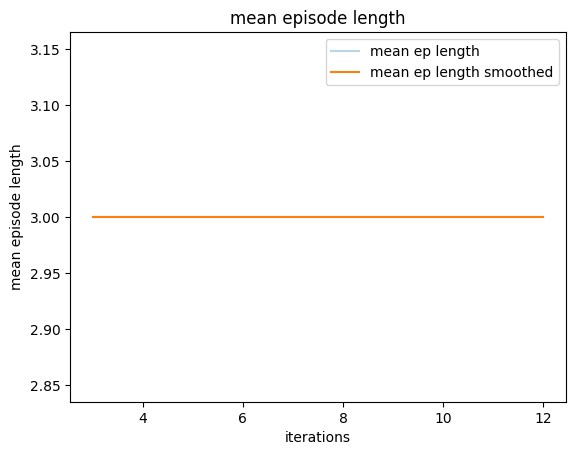

In [7]:
plot_mean_episode_length(agent, "logs/qlearner/")